In [1]:
import pandas as pd
import seaborn as sns
from lib.constants import AMINO_ACID_CODE_NAMES, AMINO_ACID_CODES
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [30]:
k=4
df = pd.read_csv(f'search/win{k}.csv', keep_default_na=False)
df = df.sort_values('n_matches', ascending=False)
df['prob'] = df['n_matches'] / sum(df['n_matches'])
df.to_csv(f'search/win{k}_sorted.csv', index=False)

In [38]:
print(df.sort_values('n_matches', ascending=False).head(6))
print(df.sort_values('n_matches', ascending=False).tail(6))
print(df[df.n_matches == 5])

         seq  n_matches      prob
62307   GSSG      59599  0.000332
67368   HHHH      47533  0.000265
123115  SSGS      34284  0.000191
126155  SGSS      33230  0.000185
62314   PSSG      25039  0.000139
125755  SGPS      24481  0.000136
        seq  n_matches  prob
37552  MWFC          0   0.0
97946  EWCM          0   0.0
37544  CWFC          0   0.0
32497  WCRC          0   0.0
33845  QMCC          0   0.0
22892  MCWN          0   0.0
         seq  n_matches          prob
33702   NQCC          5  2.784871e-08
127057  WMWS          5  2.784871e-08
107684  CCIF          5  2.784871e-08
33778   YHCC          5  2.784871e-08
118977  WHWP          5  2.784871e-08
...      ...        ...           ...
143244  CNYW          5  2.784871e-08
97825   QKCM          5  2.784871e-08
33659   VNCC          5  2.784871e-08
100754  PWKM          5  2.784871e-08
34095   SCQC          5  2.784871e-08

[105 rows x 3 columns]


In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='seq', y='n_matches', ax=ax)
ax.set_ylabel('Number of matches')
ax.set_xlabel('Amino Acid')
ax.set_title(f'Number of matches for each amino acid in PDB')
ax2 = ax.twinx()
sns.lineplot(data=df, x='seq', y='prob', ax=ax2, color='r')
ax2.set_ylabel('Probability', color='r')
ax2.tick_params(axis='y', labelcolor='r')

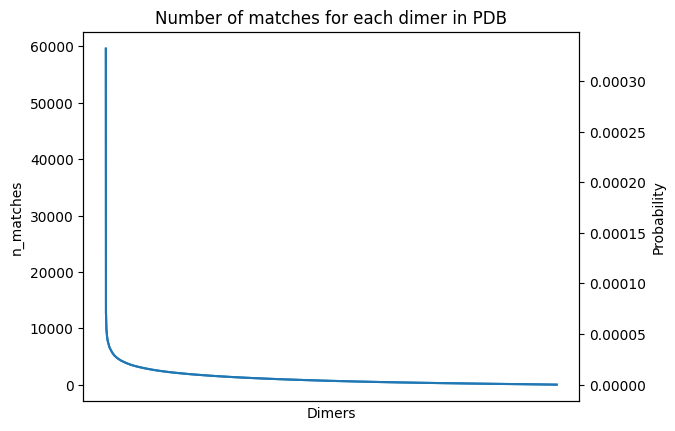

In [4]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x=range(len(df)), y='n_matches', ax=ax)
ax.set_xlabel('Dimers')
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title(f'Number of matches for each dimer in PDB')
ax2 = ax.twinx()
sns.lineplot(data=df, x=range(len(df)), y='prob', ax=ax2)
ax2.set_ylabel('Probability')
ax2.tick_params(axis='y')

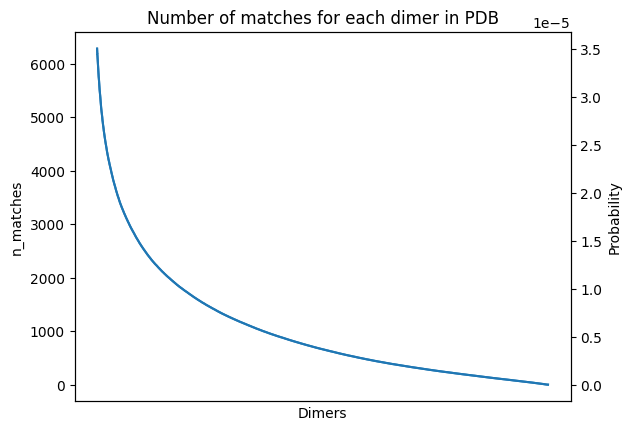

In [7]:
tmp = df[df.n_matches < df.n_matches.quantile(0.99)]
fig, ax = plt.subplots()
sns.lineplot(data=tmp, x=range(len(tmp)), y='n_matches', ax=ax)
ax.set_xlabel('Dimers')
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_title(f'Number of matches for each dimer in PDB')
ax2 = ax.twinx()
sns.lineplot(data=tmp, x=range(len(tmp)), y='prob', ax=ax2)
ax2.set_ylabel('Probability')
ax2.tick_params(axis='y')

Text(0.5, 0.98, 'KDE: Number of matches for 160000 Tetramers')

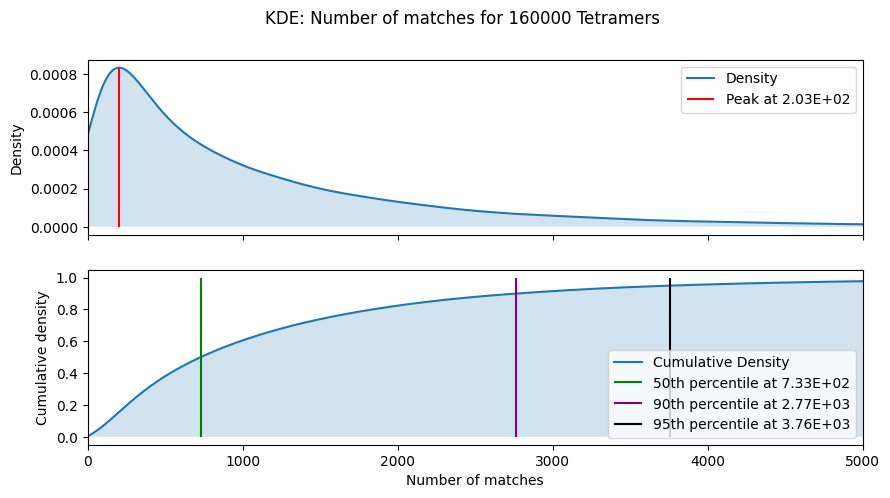

In [19]:
kde = gaussian_kde(df.n_matches.values)
x = np.linspace(0, df.n_matches.max(), 10000)
p = kde(x)
c = np.cumsum(p) / np.sum(p)
peak = x[np.argmax(p)]

fig, axes = plt.subplots(2, sharex=True, figsize=(10, 5))
# sns.kdeplot(data=df, x='n_matches', fill=True, ax=axes[0])
axes[0].plot(x, p, label='Density')
axes[0].fill_between(x, 0, p, alpha=0.2)
axes[0].vlines(peak, 0, p.max(), color='red', label=f'Peak at {peak:.2E}')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[1].plot(x, c, label='Cumulative Density')
perc = x[np.argmax(c > 0.5)]
axes[1].vlines(perc, 0, 1, color='green', label=f'50th percentile at {perc:.2E}')
perc = x[np.argmax(c > 0.9)]
axes[1].vlines(perc, 0, 1, color='purple', label=f'90th percentile at {perc:.2E}')
perc = x[np.argmax(c > 0.95)]
axes[1].vlines(perc, 0, 1, color='black', label=f'95th percentile at {perc:.2E}')
axes[1].fill_between(x, 0, c, alpha=0.2)
axes[1].legend()
axes[1].set_xlabel('Number of matches')
axes[1].set_ylabel('Cumulative density')
axes[0].set_xlim(0, 5000)
axes[1].set_xlim(0, 5000)
fig.suptitle('KDE: Number of matches for 160000 Tetramers')

In [21]:
df

,seq,n_matches,prob,log_prob,bin
62307,GSSG,59599,0.000332,-3.478926,"(-3.508, -3.405]"
67368,HHHH,47533,0.000265,-3.577170,"(-3.611, -3.508]"
123115,SSGS,34284,0.000191,-3.719073,"(-3.818, -3.714]"
126155,SGSS,33230,0.000185,-3.732635,"(-3.818, -3.714]"
62314,PSSG,25039,0.000139,-3.855548,"(-3.921, -3.818]"
...,...,...,...,...,...
118892,MCWP,0,0.000000,0.000000,"(-0.103, 0.0]"
134894,PCWT,0,0.000000,0.000000,"(-0.103, 0.0]"
139282,NCHW,0,0.000000,0.000000,"(-0.103, 0.0]"
46884,CCWQ,0,0.000000,0.000000,"(-0.103, 0.0]"


Text(0.5, 25.722222222222214, 'Amino Acid')

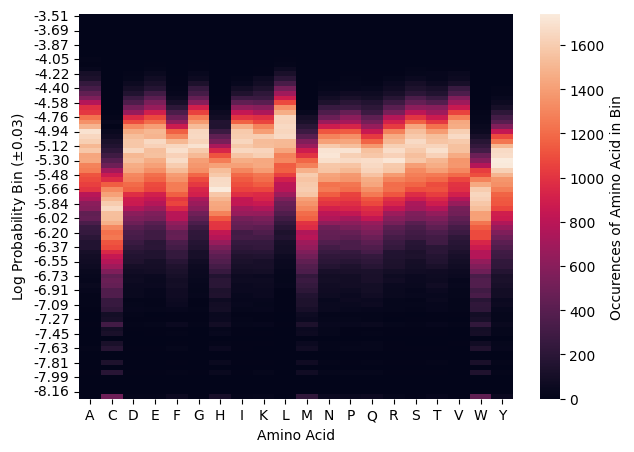

In [45]:
df['log_prob'] = np.log10(df['prob'])
df.loc[df.log_prob == -np.inf, 'log_prob'] = df[df.log_prob != -np.inf].log_prob.min()
df['bin'] = pd.cut(df.log_prob, bins=80)
df_chars = df.seq.apply(list).explode().reset_index()
df_chars.columns = ['og_index', 'aa']
merged = df_chars.merge(df, left_on='og_index', right_index=True)
char_counts = merged.groupby(['bin', 'aa'], observed=False).size().unstack(fill_value=0)

pm =  r'$\pm$' + f'{char_counts.index[0].length/2:.2f}'
idxs = []
for idx in char_counts.index:
    idxs.append(f'{idx.mid:.2f}')
char_counts.index = idxs
char_counts = char_counts.iloc[::-1]
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(char_counts, cbar_kws={'label': 'Occurences of Amino Acid in Bin'})
ax.set_ylabel(f'Log Probability Bin ({pm})')
ax.set_xlabel('Amino Acid')

## Joint Prob - Dimer

In [ ]:
df1 = pd.read_csv('search/win1_sorted.csv', keep_default_na=False)
df2 = pd.read_csv('search/win2_sorted.csv' , keep_default_na=False)
# show joint probability of amino acids vs probability of dimers
# also find probability of dimer given the joint probability of amino acids

probs = df1.set_index('seq').prob
df2['joint_prob'] = df2.seq.apply(lambda x: probs[x[0]] * probs[x[1]])

In [ ]:
fig, ax = plt.subplots()
joint_probs = np.outer(df1.prob, df1.prob)
sns.heatmap(joint_probs, ax=ax, vmin=0, vmax=0.01)
ax.set_title('Joint probability of amino acids')
ax.set_xticklabels(df1.seq)
ax.set_yticklabels(df1.seq);

In [ ]:
probs = []
matches = []
seqs = df1.seq
for aa1 in seqs:
    p = []
    m = []
    for aa2 in seqs:
        p.append(df2.loc[df2.seq == aa1+aa2].prob.values[0])
        m.append(df2.loc[df2.seq == aa1+aa2].n_matches.values[0])
    probs.append(p)
    matches.append(m)
probs = np.array(probs)
matches = np.array(matches)
fig, ax = plt.subplots()
sns.heatmap(probs, ax=ax, vmin=0, vmax=0.01)
ax.set_title('Observed probability of Dimers')
ax.set_xticklabels(seqs)
ax.set_yticklabels(seqs);

In [ ]:
seq = 'HH'
print(
    df1[df1.seq==seq[0]].prob.values[0], 
    df1[df1.seq==seq[1]].prob.values[0],
)
j = df1[df1.seq==seq[0]].prob.values[0]*df1[df1.seq==seq[1]].prob.values[0]
p = df2[df2.seq==seq].prob.values[0]
print(j)
print(p)
print(j/p)

In [ ]:
probs_ratio = joint_probs / probs
fig, ax = plt.subplots()
sns.heatmap(probs_ratio, ax=ax)
ax.set_title('Ratio of Joint Probability to Probability of Dimers')
ax.set_xticklabels(seqs)
ax.set_yticklabels(seqs);

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(np.outer(df1.prob, df1.prob), ax=ax)
ax.set_title('Joint probability of amino acids')
ax.set_xticklabels(df1.seq)
ax.set_yticklabels(df1.seq);

In [ ]:
df2 = df2.sort_values('joint_prob', ascending=False).reset_index(drop=True)
heatmap = df2[['seq','prob', 'joint_prob']].set_index('seq').T
fig, axes = plt.subplots(8, figsize=(7, 5))
# sns.lineplot(data=df2, x=df2.index, y='joint_prob', ax=ax)
# sns.barplot(data=df2.iloc[:100], x=df2.index[:100], y='prob', ax=ax)

m = max(df2.joint_prob.max(), df2.prob.max())
for i in range(8):
    sns.heatmap(heatmap.iloc[:,i*50:(i+1)*50], ax=axes[i], cbar=False, vmin=0, vmax=0.01)
    axes[i].xaxis.set_ticks_position('top')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', which='major', labelsize=5, length=0, rotation=0)
    axes[i].set_yticks([])
    axes[i].set_yticklabels([])
axes[-1].set_xlabel('Dimers')
plt.tight_layout()

## Joint Prob - Trimer

In [125]:
df1 = pd.read_csv('search/win1_sorted.csv', keep_default_na=False)
df3 = pd.read_csv('search/win3_sorted.csv' , keep_default_na=False)
log_probs = np.log10(df1.set_index('seq').prob)
df3['log_prob'] = np.log10(df3.prob)
df3['log_joint_prob'] = df3.seq.apply(lambda x: np.sum([log_probs[aa] for aa in x]))
df3['log_probs_ratio'] = df3.log_joint_prob - df3.log_prob
df3['probs_ratio'] = 10**df3.log_probs_ratio
df3['joint_prob'] = 10**df3.log_joint_prob

In [149]:
df3.sort_values('prob', ascending=False).head(5)

,seq,n_matches,prob,log_prob,log_joint_prob,log_probs_ratio,probs_ratio,joint_prob
0,AAA,149890,0.000824,-3.083845,-3.324657,-0.240813,0.574364,0.000474
1,SSG,145710,0.000801,-3.096128,-3.531898,-0.435770,0.366632,0.000294
2,LAA,144364,0.000794,-3.100159,-3.243769,-0.143611,0.718438,0.000570
3,AAL,144288,0.000794,-3.100387,-3.243769,-0.143382,0.718816,0.000570
4,ALL,134201,0.000738,-3.131862,-3.162881,-0.031020,0.931066,0.000687


Text(0, 0.5, 'Observed Probability')

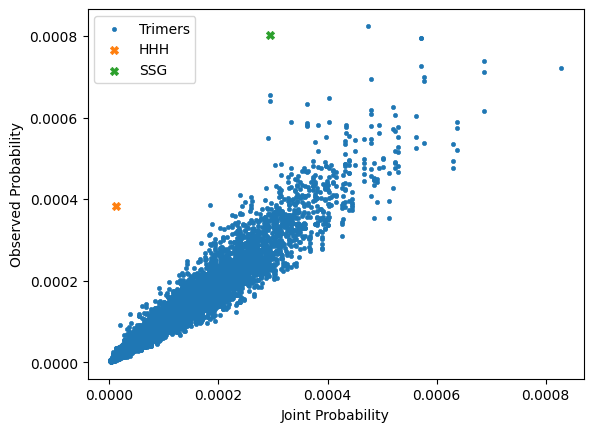

In [152]:
fig, ax = plt.subplots()
sns.scatterplot(data=df3, x='joint_prob', y='prob', marker='.', ax=ax, edgecolor=None, label='Trimers')
sns.scatterplot(data=df3[df3.seq=='HHH'], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='HHH')
sns.scatterplot(data=df3[df3.seq=='SSG'], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='SSG')
ax.legend()
ax.set_xlabel('Joint Probability')
ax.set_ylabel('Observed Probability')

In [109]:
df3.sort_values('probs_ratio', ascending=False).head(5)

,seq,n_matches,prob,log_prob,joint_prob,log_probs_ratio,probs_ratio
7999,CHW,191,0.000001,-5.978584,-5.453098,0.525486,3.353406
7990,CIW,517,0.000003,-5.546127,-5.053186,0.492941,3.111291
7702,PCE,2241,0.000012,-4.909176,-4.486211,0.422965,2.648285
7937,WPM,1029,0.000006,-5.247202,-4.862788,0.384414,2.423341
7715,DPC,2192,0.000012,-4.918777,-4.553240,0.365537,2.320260


# Joint Prob. Tetramer

In [57]:
df1 = pd.read_csv('search/win1_sorted.csv', keep_default_na=False)
df4 = pd.read_csv('search/win4_sorted.csv' , keep_default_na=False)
log_probs = np.log10(df1.set_index('seq').prob)
df4['log_joint_prob'] = df4.seq.apply(lambda x: np.sum([log_probs[aa] for aa in x]))
df4['log_prob'] = np.log10(df4.prob)
df4['log_probs_ratio'] = df4.log_joint_prob - df4.log_prob
df4['probs_ratio'] = 10**df4.log_probs_ratio
df4['joint_prob'] = 10**df4.log_joint_prob
# df4['joint_prob'] = df4.seq.apply(lambda x: np.prod([df1.loc[df1.seq==aa].prob.values[0] for aa in x]))
# df4['probs_ratio'] = df4.joint_prob / df4.prob

/home/musa/dev/protein-dihedral-visualization/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
df4.sort_values('prob', ascending=False).head(5)

,seq,n_matches,prob,log_joint_prob,log_prob,log_probs_ratio,probs_ratio,joint_prob
0,GSSG,59599,0.000332,-4.672971,-3.478926,-1.194045,0.063967,2.123388e-05
1,HHHH,47533,0.000265,-6.540689,-3.577170,-2.963519,0.001088,2.879460e-07
2,SSGS,34284,0.000191,-4.727311,-3.719073,-1.008238,0.098121,1.873653e-05
3,SGSS,33230,0.000185,-4.727311,-3.732635,-0.994676,0.101233,1.873653e-05
4,PSSG,25039,0.000139,-4.875078,-3.855548,-1.019530,0.095603,1.333283e-05


Text(0, 0.5, 'Observed Probability')

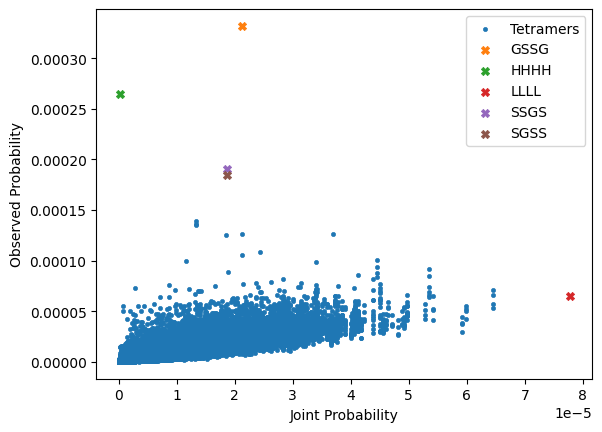

In [67]:
fig, ax = plt.subplots()
sns.scatterplot(data=df4, x='joint_prob', y='prob', marker='.', ax=ax, edgecolor=None, label='Tetramers')
sns.scatterplot(data=df4[df4.seq=='GSSG'], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='GSSG')
sns.scatterplot(data=df4[df4.seq=='HHHH'], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='HHHH')
sns.scatterplot(data=df4[df4.seq=='LLLL'], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='LLLL')
sns.scatterplot(data=df4[df4.seq=='SSGS'], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='SSGS')
sns.scatterplot(data=df4[df4.seq=='SGSS'], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='SGSS')
ax.legend()
ax.set_xlabel('Joint Probability')
ax.set_ylabel('Observed Probability')

In [114]:
df4[df4.seq.isin(['AAAA'])]

,seq,n_matches,prob,log_joint_prob,log_prob,log_probs_ratio,probs_ratio,joint_prob,seq_key
8,AAAA,22617,0.000126,-4.432876,-3.89973,-0.533147,0.29299,0.000037,AAAA


In [115]:
data = df4.groupby('seq_key').mean(numeric_only=True)
data.loc['AAAA']

n_matches          22617.000000
prob                   0.000126
log_joint_prob        -4.432876
log_prob              -3.899730
log_probs_ratio       -0.533147
probs_ratio            0.292990
joint_prob             0.000037
Name: AAAA, dtype: float64

In [76]:
data[(data.joint_prob < 0.00005) & (data.prob > 0.0002)]

,n_matches,prob,log_joint_prob,log_prob,log_probs_ratio,probs_ratio,joint_prob
seq_key,,,,,,,
HHHH,47533,0.000265,-6.540689,-3.57717,-2.963519,0.001088,2.879460e-07


Text(0, 0.5, 'Observed Probability')

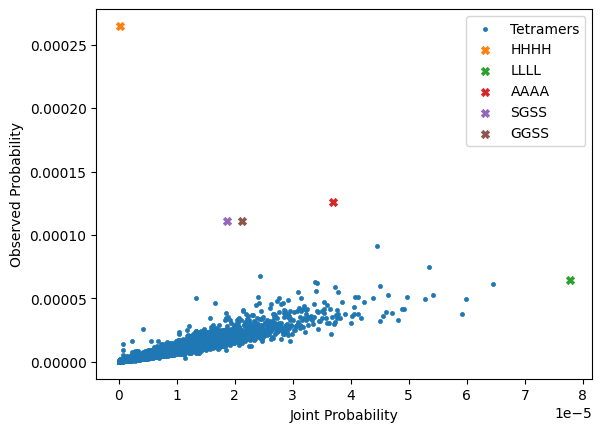

In [133]:
fig, ax = plt.subplots()
data = df4.groupby('seq_key').mean(numeric_only=True)
sns.scatterplot(data=data, x='joint_prob', y='prob', marker='.', ax=ax, edgecolor=None, label='Tetramers')
# sns.scatterplot(data=data.loc[['HHHH']], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='HHHH')
# sns.scatterplot(data=data.loc[['AAAA']], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='AAAA')
# for aa in df1.seq:
    # sns.scatterplot(data=data.loc[[''.join([aa]*4)]], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label=aa)
sns.scatterplot(data=data.loc[['HHHH']], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='HHHH')
sns.scatterplot(data=data.loc[['LLLL']], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='LLLL')
sns.scatterplot(data=data.loc[['AAAA']], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='AAAA')
sns.scatterplot(data=data.loc[['GSSS']], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='SGSS')
sns.scatterplot(data=data.loc[['GGSS']], x='joint_prob', y='prob', marker='X', ax=ax, edgecolor=None, label='GGSS')

ax.legend()
ax.set_xlabel('Joint Probability')
ax.set_ylabel('Observed Probability')

In [28]:
df4.sort_values('prob', ascending=False).head(5)

,seq,n_matches,prob,log_prob,log_joint_prob,log_probs_ratio,probs_ratio,joint_prob
0,GSSG,59599,0.000332,-3.478926,-4.672971,-1.194045,0.063967,2.123388e-05
1,HHHH,47533,0.000265,-3.577170,-6.540689,-2.963519,0.001088,2.879460e-07
2,SSGS,34284,0.000191,-3.719073,-4.727311,-1.008238,0.098121,1.873653e-05
3,SGSS,33230,0.000185,-3.732635,-4.727311,-0.994676,0.101233,1.873653e-05
4,PSSG,25039,0.000139,-3.855548,-4.875078,-1.019530,0.095603,1.333283e-05


# Hydrophobic Index

In [154]:
# https://www.sigmaaldrich.com/US/en/technical-documents/technical-article/protein-biology/protein-structural-analysis/amino-acid-reference-chart
hydrophobic_s = """\
Leu 100 Phe 100
Ile 100 Ile 99
Phe 92 Trp 97
Trp 84 Leu 97
Val 79 Val 76
Met 74 Met 74
Cys 52 Tyr 63
Tyr 49 Cys 49
Ala 47 Ala 41
Thr 13 Thr 13
Glu 8 His 8
Gly 0 Gly 0
Ser -7  Ser -5
Gln -18 Gln -10
Asp -18 Asp -55
Arg -26 Arg -14
Lys -37 Lys -23
Asn -41 Asn -28
His -42 Glu -31
Pro -46 Pro -46\
"""
hydrophobic_index_ph2 = {AMINO_ACID_CODES[l.split()[0].upper()]:l.split()[1] for l in hydrophobic_s.split('\n')}
hydrophobic_index_ph7 = {AMINO_ACID_CODES[l.split()[2].upper()]:l.split()[3] for l in hydrophobic_s.split('\n')}

In [160]:
df = pd.read_csv('search/win1_sorted.csv', keep_default_na=False)

In [161]:
df['h_2'] = df.seq.apply(lambda x: np.sum([int(hydrophobic_index_ph2[aa]) for aa in x]))
df['h_7'] = df.seq.apply(lambda x: np.sum([int(hydrophobic_index_ph7[aa]) for aa in x]))

Text(0, 0.5, 'Number of matches')

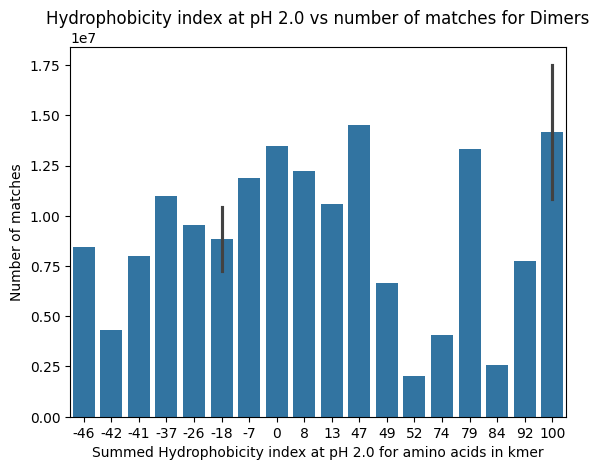

In [174]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='h_2', y='n_matches', ax=ax)
# sns.scatterplot(data=df, x='h_2', y='n_matches', ax=ax, marker='o')
ax.set_title('Hydrophobicity index at pH 2.0 vs number of matches for Dimers')
ax.set_xlabel('Summed Hydrophobicity index at pH 2.0 for amino acids in kmer')
ax.set_ylabel('Number of matches')
# sns.scatterplot(data=df, x='h_7b', y='n_matches')